# Palmer Penguins
***

This notebook contains my analysis of the palmer penguins data set. The palmer penguins data set contains data measurements for three different penguin species, the Chinstrap, Gentoo and Adélie penguin. The data was collected between 2007 - 2009 by Dr. Kristen Gorman with the [Palmer Station Long Term Ecological Research Program](https://lternet.edu/site/palmer-antarctica-lter/) on three different islands in the Palmer Archipelago, Antarctica. 

![The Palmer Penguins. Artwork by @allison_horst](https://sebastiancallh.github.io/ox-hugo/palmer-penguins.png)

The Palmer Penguins, artwork by @allison_horst






According to [AllisonHorst.github.io](https://github.com/allisonhorst/palmerpenguins/blob/main/README.md) "the goal of the palmerpenguins is to provide a great dataset for data exploration and visualization, as an alternative to iris". 

## Import Modules
***

Three different modules are required for this analysis:
* pandas
* numpy
* matplotlib.pyplot

Pandas is a python library for manipulating data and for performing data analysis. It can perform statistical calculations, find a correlations between two or more columns and it can be used to visualise data. The pandas package must first be loaded using the 'import' command to work with it. It is usually imported with the alias 'pd'. 

Numpy can perform a wide variety of mathematical calculations on arrays and matrices. All the elements in a numpy array should be of the same data type.

Matplotlib.pyplot is used to create plots

In [1]:
# Import pandas
import pandas as pd

# Import numpy
import numpy as np

# Import matplotlib.pylab
import matplotlib.pylab as plt

## Importing the data set
***

The data set was imported as a csv file from [Seaborn Data](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv). The original raw data set is available on Alison Horst's [GitHub](https://github.com/allisonhorst/palmerpenguins/blob/main/inst/extdata/penguins_raw.csv). 

The data set used has the advantage in that it has been processed to remove extraneous information such as any NA in the data and the year that data was collected. The other minor difference is that male and female are capitalised in the Seaborn data set. 

In [2]:
# Load the penguins data set
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

## Overview of the data set and the variables it contains
***

There are a couple of commands that can be used to get an overview of the data set. 

The first one of these is simply, df. This will print out a few rows of the parsed csv from the start and the end of the dataframe. Another useful command is df.head(), which will by default print the first 5 rows of the data set. 

In [3]:
# Have a look. Prints out a few rows of the parsed csv file.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
# df.head() prints out the first five rows of the csv file.
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


We can see from the results that the dataset has 344 rows and seven columns. Each row gives the information that was collected for each individual penguin. For each penguin there are seven possible variables. 

The seven variables in the dataset are 
* species
* island
* bill_length
* bill depth
* flipper length
* the weight 
* the sex of the penguin.

## Suggest the datatypes that should be used to model the dataset


The .info() method gives us more concise information about the dataframe. Like df and df.head() it tells us the the number and names of each column, but it also provides some additional information. It also tells us the data type of each column and the number of non-null entries in each variable. 

In [5]:
# df.info() gives concise information about the dataframe. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


The data type (dtypes) of the species, island and sex attributes are object types. This is accurate as they are all strings. Species contains three different objects, which are the penguin species names, Adelie, Gentoo and Chinstrap. The names of the three islands are Biscoe, Dream and Torgersen. The sex of the penguins are either male or female. This variable had the highest no of null recorded where the sex of the penguin could not be identified. 

The bill length, bill depth and flipper length are all measured in mm with the data given to one decimal place. These are floating point number datatypes. The weight or body mass of the penguins is stated in grams is also given to one decimal place. 

In [6]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [7]:
# Describe the data set. Summary statistics about the data file. 
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


NEED to separate out summary statistcs by penguin species

EMpty rows NaN

## Create a bar chart of an appropriate variable
***

A bar chart can be used to examine the penguin population on each island. 

In [8]:
# Unique variables in the island attribute
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [9]:
# Penguin population on each island.
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

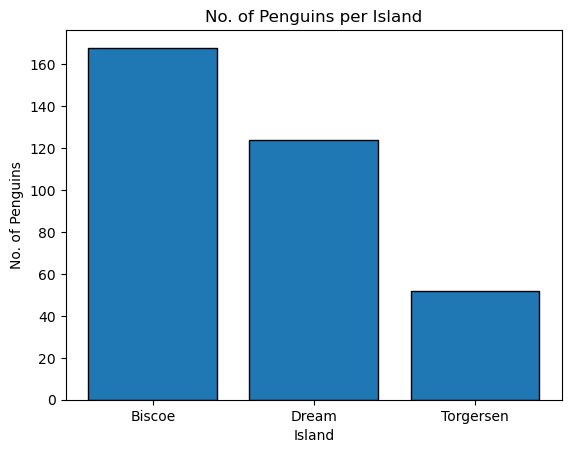

In [45]:
# Plotting a bar chart of the penguin population on each island

# Setting the x-axis to the islands
xpoints = np.array(["Biscoe", "Dream", "Torgersen"])

# Setting the y-axis to the count of each penguin per island
ypoints = np.array(df['island'].value_counts())

plt.bar(xpoints, ypoints, edgecolor = "black")

plt.xlabel("Island")
plt.ylabel("No. of Penguins")
plt.title("No. of Penguins per Island")
plt.show()

### Investigating the penguin species that are present on each island. 

While the above bar chart is fine it would be nice to get more information about the penguins and their relationship to the island. Some additional information that could be plotted to a bar chart is a breakdown of the penguin count by species on each island. 

To do this we need to know:
* the penguin species that are present on each island
* a count of the penguins by species for each island.

In [11]:
# Penguin species present on each island.
df.groupby('island')['species'].unique()

island
Biscoe          [Adelie, Gentoo]
Dream        [Adelie, Chinstrap]
Torgersen               [Adelie]
Name: species, dtype: object

In [46]:
# A count of the different penguin species on each island.  
df.groupby('island')['species'].value_counts()

island     species  
Biscoe     Gentoo       124
           Adelie        44
Dream      Chinstrap     68
           Adelie        56
Torgersen  Adelie        52
Name: count, dtype: int64

The results of the count of the different species on each island can be visualised using a bar chart. After much trial and error, a [Countplot in Seaborn](https://seaborn.pydata.org/generated/seaborn.countplot.html) appears to be the simplest method of making the required bar chart. https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/?ref=ml_lbp

Firstly, seaborn must be imported. 

In [13]:
import seaborn as sns

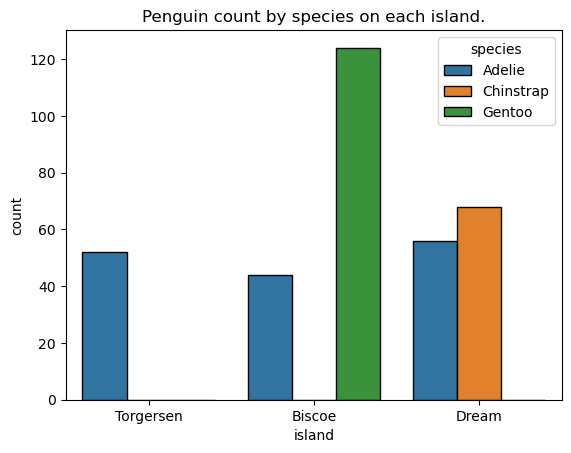

In [43]:
# A breakdown of the penguin population on each island by species.
sns.countplot(df, x = 'island',
            hue = 'species',
            edgecolor = 'black'
            )
plt.title('Penguin count by species on each island.')
plt.show()

## Histogram of an appropriate variable
***
Task: Make a histogram using an appropriate variable. 

My chosen variable is flipper lengths. WHY?

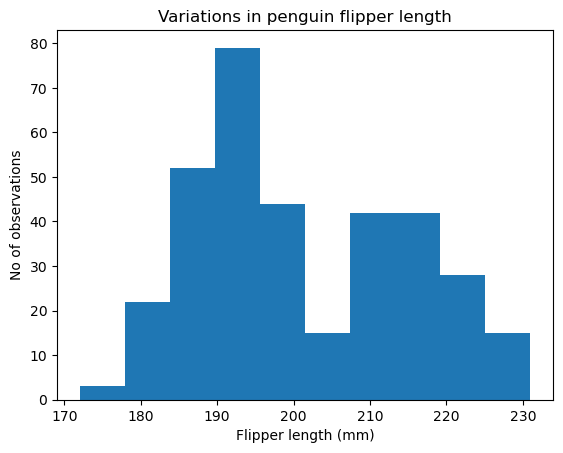

In [15]:
# Plot of the distribution of flipper length (mm)
plt.hist(np.array(df["flipper_length_mm"]))
plt.xlabel("Flipper length (mm)")
plt.ylabel("No of observations")
plt.title("Variations in penguin flipper length")
plt.show()

The histogram would be expected to have a normal curve distribution but as we can see it doesn't and has a very unusual shape. Further analysis is required to explain the shape of the histogram.

__Normal Distribution__

![Normal Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Standard_Normal_Distribution.png/320px-Standard_Normal_Distribution.png)




As there are three different penguin species, I will now analyse the flipper length for each species.

In [16]:
# Investigating the mean, standard deviation and median of the penguin species
df.groupby("species")["flipper_length_mm"].agg([np.mean, np.std, np.median])

,mean,std,median
species,,,
Adelie,189.953642,6.539457,190.0
Chinstrap,195.823529,7.131894,196.0
Gentoo,217.186992,6.484976,216.0


In [17]:
# Same as above but using pivot_table # Investigating the mean, standard deviation and median of the penguin species
df.pivot_table(values = "flipper_length_mm", index = "species", aggfunc=[np.mean, np.std, np.median])

,mean,std,median
,flipper_length_mm,flipper_length_mm,flipper_length_mm
species,,,
Adelie,189.953642,6.539457,190.0
Chinstrap,195.823529,7.131894,196.0
Gentoo,217.186992,6.484976,216.0


The above table demonstrates that each of the penguin species have noticeably different flipper lengths. The Gentoo penguins have the largest flippers with the average flipper length of 217mm and a median value of 216mm. The Adelie penguins have the smallest flipper length of 189mm with a median of 190mm.

The bars on the right of the above histogram from approximately 208mm is the distribution of flipper lengths for the Gentoo penguin. The bars on the left are for the overlapping values of the Adelie and Chinstrap penguins.

An improved histogram is required to show the distribution of flipper lengths for the penguin species. 

In [18]:
# Renaming and reorganising the dataset so that the species column is now the index column. This will make slicing using .loc() easier. 
penguins = df.set_index("species")
penguins.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [19]:
# I had difficulty selecting the the flipper length by species from the above table. Simplified the task. Not ideal but it will do for now. 
# COME BACK TO THIS IN A FEW WEEKS WHEN I FIGURE OUT WHAT I'M DOING

# A new dataframe with only the species and flipper length variables.
flipper_length = penguins[["flipper_length_mm"]]
flipper_length.head()

,flipper_length_mm
species,
Adelie,181.0
Adelie,186.0
Adelie,195.0
Adelie,NaN
Adelie,193.0


In [20]:
# Creating new dataframes for each penguin species selecting the flipper length for each species.
adelie_flipper = flipper_length.loc[["Adelie"]]
chinstrap_flipper = flipper_length.loc[["Chinstrap"]]
gentoo_flipper = flipper_length.loc[["Gentoo"]]

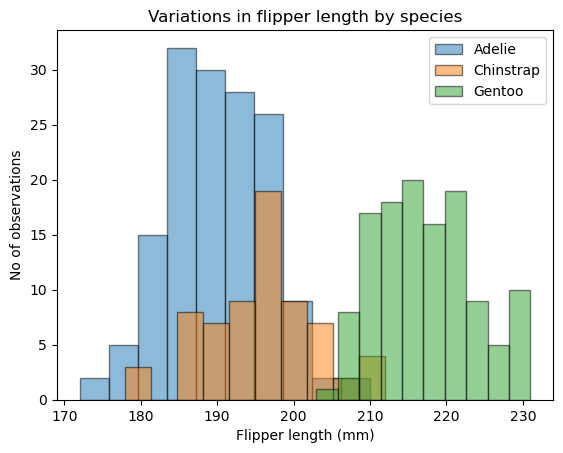

In [21]:
# Histogram of the variations in flipper length by species.

# This is my histogram for the task.

fig, ax = plt.subplots()
ax.hist(adelie_flipper, label = "Adelie", edgecolor = "black", alpha = 0.5)
ax.hist(chinstrap_flipper, label = "Chinstrap", edgecolor = "black", alpha = 0.5)
ax.hist(gentoo_flipper, label = "Gentoo", edgecolor = "black", alpha = 0.5)
ax.set_title("Variations in flipper length by species")
ax.set_xlabel("Flipper length (mm)")
ax.set_ylabel("No of observations")
ax.legend()
plt.show()

This histogram clearly demonstrates that each species has a distinct flipper size. It would be possible from flipper length to identify a penguin as a Gentoo penguin. It would be more difficult to classify the Adelie and the Chinstrap penguins by their flipper lengths alone as the values overlap.

# Project
***

Select two variables for the data set and provide an analysis of how correlated they are.

## Brainstorm

WHat two variables could I compare?

* Is flipper length or bill length/depth in proportion to the body mass
* Do heavier penguins have longer flippers or bill length?
* Bigger bills, bigger body mass? Bigger bills can eat more? Could I calculate the bill volume, approximating the volume of the bill to be similiar to a cone?
* Compare male vs female within the chosen variables
* Some information on the sex of the penguin is missing for some penguins. Could I predict whether they are male or female based on the other traits. 
* Adelie penguins live on all three islands, are there any differences in flipper, bills, body mass? 

In [22]:
df.groupby("species").agg({"flipper_length_mm": 'mean', 'bill_length_mm' : 'mean', 'bill_depth_mm' : 'mean', 'body_mass_g' : 'mean'})

,flipper_length_mm,bill_length_mm,bill_depth_mm,body_mass_g
species,,,,
Adelie,189.953642,38.791391,18.346358,3700.662252
Chinstrap,195.823529,48.833824,18.420588,3733.088235
Gentoo,217.186992,47.504878,14.982114,5076.016260


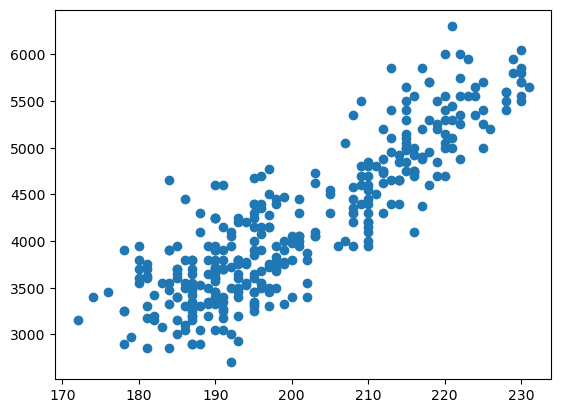

In [23]:
# Simple scatter plot to get started of flipper length (mm) vs body mass (g)
plt.scatter(penguins['flipper_length_mm'], penguins['body_mass_g'])
plt.show()

A simple plot of flipper_lengths vs body_mass is not very informative. We know there are three different penguin species. 
How do I do this?

In [24]:
adelie = penguins.loc[['Adelie']]
adelie.head()

chinstrap = penguins.loc[['Chinstrap']]
chinstrap.head()

gentoo = penguins.loc[['Gentoo']]
gentoo.head()


,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE


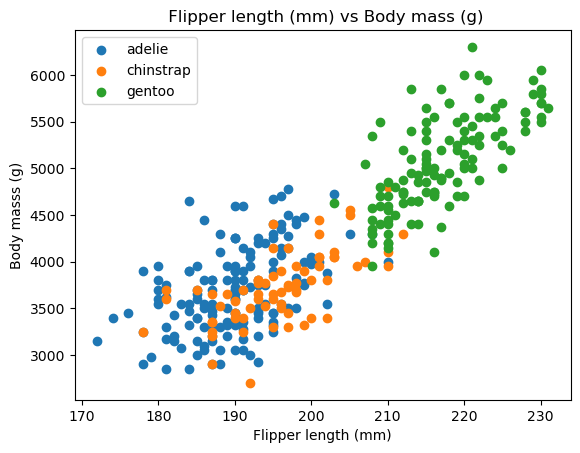

In [25]:
fig, ax = plt.subplots()

ax.scatter(adelie['flipper_length_mm'], adelie['body_mass_g'], label = 'adelie')
ax.scatter(chinstrap['flipper_length_mm'], chinstrap['body_mass_g'], label = 'chinstrap')
ax.scatter(gentoo['flipper_length_mm'], gentoo['body_mass_g'], label = 'gentoo')
ax.set_xlabel('Flipper length (mm)')
ax.set_ylabel('Body masss (g)')
ax.set_title(' Flipper length (mm) vs Body mass (g)')
ax.legend()
plt.show()

In [ ]:
# The number of penguin species per island. 

df.groupby('species')['island'].unique()


species
Adelie       [Torgersen, Biscoe, Dream]
Chinstrap                       [Dream]
Gentoo                         [Biscoe]
Name: island, dtype: object

Nice plot required here to show the breakdown of penguins on each island. Stacked bar chart with a different colour for each penguin species.


### Summary of the penguin population on each island. 

The three islands are Biscoe, Dream and Torgersen. Biscoe is the most populous island with 168 penguins or 48.8% of the penguin population. Torgersen is the least populous island with only 52 penguins (or 15.1%) of the penguins studied. 

Both Biscoe and Dream have two penguin species, with only one penguin species present on Torgersen. Adelie penguins were found on all three islands. With Chinstrap and Gentoo found on Dream and Torgersen respectively.

** Investigating the Penguin Species.

In [ ]:
df.groupby('species').count()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,152,151,151,151,151,146
Chinstrap,68,68,68,68,68,68
Gentoo,124,123,123,123,123,119


In [ ]:
df.groupby('island')['body_mass_g'].mean()


island
Biscoe       4716.017964
Dream        3712.903226
Torgersen    3706.372549
Name: body_mass_g, dtype: float64

In [ ]:
df.groupby('species')['body_mass_g'].mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

In [ ]:
# Number and sex of penguins
df["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [ ]:
# Are male penguins heavier than female penguins?

df.groupby('sex')['body_mass_g'].mean()

sex
FEMALE    3862.272727
MALE      4545.684524
Name: body_mass_g, dtype: float64

In [ ]:
df.groupby('species')['flipper_length_mm'].mean()


species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64

In [ ]:
# Same as above but using pivot_table

df.pivot_table(values = "flipper_length_mm", index = "species", aggfunc=[np.mean, np.std, np.median])

,mean,std,median
,flipper_length_mm,flipper_length_mm,flipper_length_mm
species,,,
Adelie,189.953642,6.539457,190.0
Chinstrap,195.823529,7.131894,196.0
Gentoo,217.186992,6.484976,216.0


In [ ]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2 (typographic points are 1/72 in.).
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single

### References

Datacamp [Introduction to Data Visualization with Matplotlib](https://app.datacamp.com/learn/courses/introduction-to-data-visualization-with-matplotlib)

Datacamp [Data Manipulation with Pandas](https://app.datacamp.com/learn/courses/data-manipulation-with-pandas)



## End

***